In [7]:
#importing libraries
import pandas as pd
import numpy as np
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics,svm

import matplotlib.pyplot as plt0
import time

# MOTOR 18 Dataset (with Age and Sex)

In [8]:
m18 = pd.read_csv('motor_18_data.csv')

In [9]:
m18.head()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [10]:
print(m18.shape)

(5875, 21)


In [11]:
m18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   sex            5875 non-null   int64  
 2   test_time      5875 non-null   float64
 3   motor_UPDRS    5875 non-null   float64
 4   total_UPDRS    5875 non-null   float64
 5   Jitter(%)      5875 non-null   float64
 6   Jitter(Abs)    5875 non-null   float64
 7   Jitter:RAP     5875 non-null   float64
 8   Jitter:PPQ5    5875 non-null   float64
 9   Jitter:DDP     5875 non-null   float64
 10  Shimmer        5875 non-null   float64
 11  Shimmer(dB)    5875 non-null   float64
 12  Shimmer:APQ3   5875 non-null   float64
 13  Shimmer:APQ5   5875 non-null   float64
 14  Shimmer:APQ11  5875 non-null   float64
 15  Shimmer:DDA    5875 non-null   float64
 16  NHR            5875 non-null   float64
 17  HNR            5875 non-null   float64
 18  RPDE    

# Objective 1 : Predicting Motor Updrs

In [12]:
dependent_variable = 'motor_UPDRS'
independent = m18.columns.tolist()
independent.remove(dependent_variable)
independent

['age',
 'sex',
 'test_time',
 'total_UPDRS',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

We divide the table into input and output elements

X: Characteristics Table

Y: Label Table

In [13]:
X =m18[independent].values
Y =m18.iloc[:, [3]].values

In [14]:
X.shape

(5875, 20)

In [15]:
print(Y.shape)
Y

(5875, 1)


array([[28.199],
       [28.447],
       [28.695],
       ...,
       [21.495],
       [21.007],
       [20.513]])

Then we separate our data into train and test, as shown below. We make sure our train set is 30% of our original data set.

In [16]:
# load and summarize the dataset
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4112, 20) (4112, 1)
Test (1763, 20) (1763, 1)


# Feature Selection

# Correlation

Correlation is a measure of whether two random variables are interdependent. The most common correlation measure is that of the Pearson correlation, which assumes that our random variables are distributed with a Gaussian normal distribution and refers to their linear dependence. The linear correlation measures are usually in the range from -1 to 1 with 0 meaning non-correlation. For the export of features, we are interested in having a positive index. The higher the index compared to the random variable we want to predict, the more our characteristics are correlated with it. So we have more hopes of making a good model with such random variables. One way to see how correlated our random variables are is with f-score. The f-score is a measure of correlation, and obviously the higher it is for a feature, the more likely we are to keep it in our final model.

In our case we want to predict random variables y, this means that we have to look at the correlations with each of them. So first we can make a bar-plot with f-scores the first variable motor UPDRS.

Feature 0: 317.718585
Feature 1: 6.842519
Feature 2: 17.581930
Feature 3: 35435.818389
Feature 4: 27.646906
Feature 5: 10.259162
Feature 6: 20.529248
Feature 7: 21.867360
Feature 8: 20.543295
Feature 9: 43.269931
Feature 10: 48.995313
Feature 11: 29.884959
Feature 12: 34.396250
Feature 13: 78.234553
Feature 14: 29.884161
Feature 15: 24.511189
Feature 16: 102.968048
Feature 17: 66.904271
Feature 18: 64.903708
Feature 19: 105.669295


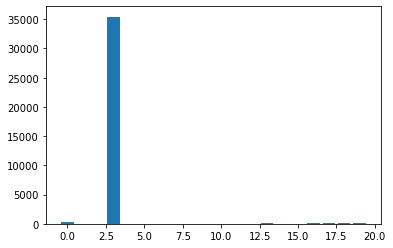

In [17]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
    fs.fit(X_train, y_train)
	# transform train input data
    X_train_fs = fs.transform(X_train)
	# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train[:,0], X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Filter Method(HeatMap)

On the one hand we ask to have a correlation between the features and the dependent variables y. But on the other hand (at least for the assumptions of the linear model to be valid) we want the feautures to be as unrelated as possible.

Features are irrelevant if they have values ​​close to zero. If they have high correlations in absolute value (either positive or negative) then there is generally a problem. We should try to keep features with as low correlations as possible.

One way to look at the correlations between our data is with the heatmap.

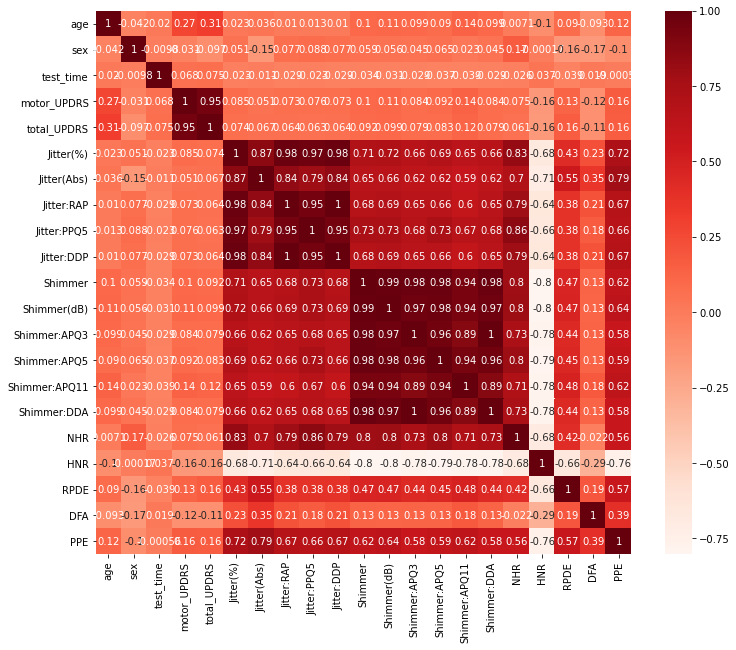

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = m18.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
#Correlation with output variable
cor_target = abs(cor['motor_UPDRS'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

age              0.273665
motor_UPDRS      1.000000
total_UPDRS      0.947231
Shimmer          0.102349
Shimmer(dB)      0.110076
Shimmer:APQ11    0.136560
HNR              0.157029
RPDE             0.128607
DFA              0.116242
PPE              0.162433
Name: motor_UPDRS, dtype: float64

# Model Training

In [20]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestRegressor
clf1=RandomForestRegressor(n_estimators=300, n_jobs=-1, max_depth=500, max_leaf_nodes=2350)

from sklearn.svm import SVR
clf2 = SVR(kernel = 'rbf')

from sklearn.linear_model import LinearRegression
clf3 = LinearRegression()

In [24]:
clf1.fit(X_train, y_train.ravel())
print("Done")
clf2.fit(X_train, y_train.ravel())
print("Done")
clf3.fit(X_train, y_train.ravel())
print("Done")



pred_RandomForest=clf1.predict(X_test)
pred_LinearRegression=clf2.predict(X_test)
pred_SVR=clf3.predict(X_test)

Done
Done
Done


In [25]:
score1 = metrics.r2_score(y_test, pred_RandomForest)
print("Random Forest Score",score1)


score2 = metrics.r2_score(y_test, pred_LinearRegression)
print("Multivalue Regression",score2)

score3 = metrics.r2_score(y_test, pred_SVR)
print("SVR",score3)

Random Forest Score 0.9985277816286857
Multivalue Regression 0.9374515000944417
SVR 0.8981564855576677


In [26]:
MSE1 = np.square(np.subtract(y_test,pred_RandomForest)).mean() 
RMSE1 = math.sqrt(MSE1)
print("Random Forest R2_Score",score1)
print("Random Forest MSE",MSE1)
print("Random Forest RMSE1",RMSE1)


score2 = metrics.r2_score(y_test, pred_LinearRegression)
MSE2 = np.square(np.subtract(y_test,pred_LinearRegression)).mean() 
RMSE2 = math.sqrt(MSE2)
print("Multivalue Regression R2_Score",score2)
print("Multivalue Regression MSE",MSE2)
print("Multivalue Regression RMSE",RMSE2)

score3 = metrics.r2_score(y_test, pred_SVR)
MSE3 = np.square(np.subtract(y_test,pred_LinearRegression)).mean() 
RMSE3 = math.sqrt(MSE3)
print("SVR",score3)
print("SVR MSE",MSE3)
print("SVR RMSE",RMSE3)

Random Forest R2_Score 0.9985277816286857
Random Forest MSE 127.35513284084244
Random Forest RMSE1 11.285173141819422
Multivalue Regression R2_Score 0.9374515000944417
Multivalue Regression MSE 120.25916361412159
Multivalue Regression RMSE 10.966273916610035
SVR 0.8981564855576677
SVR MSE 120.25916361412159
SVR RMSE 10.966273916610035


# Estimating Best Parameter in SVR using Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [28]:
grid = GridSearchCV(SVR(),param_grid,verbose=3)

In [29]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=0.1, gamma=1, score=0.116, total=   1.5s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=0.1, gamma=1, score=0.121, total=   1.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=0.1, gamma=1, score=0.115, total=   1.5s
[CV] C=0.1, gamma=1 ..................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=0.1, gamma=1, score=0.111, total=   1.4s
[CV] C=0.1, gamma=1 ..................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=0.1, gamma=1, score=0.111, total=   1.4s
[CV] C=0.1, gamma=0.1 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=0.1, gamma=0.1, score=0.844, total=   1.4s
[CV] C=0.1, gamma=0.1 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=0.1, gamma=0.1, score=0.851, total=   1.4s
[CV] C=0.1, gamma=0.1 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=0.1, gamma=0.1, score=0.851, total=   1.4s
[CV] C=0.1, gamma=0.1 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=0.1, gamma=0.1, score=0.825, total=   1.2s
[CV] C=0.1, gamma=0.1 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=0.1, gamma=0.1, score=0.831, total=   1.4s
[CV] C=0.1, gamma=0.01 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=0.1, gamma=0.01, score=0.739, total=   1.4s
[CV] C=0.1, gamma=0.01 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=0.1, gamma=0.01, score=0.747, total=   1.3s
[CV] C=0.1, gamma=0.01 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=0.1, gamma=0.01, score=0.746, total=   1.4s
[CV] C=0.1, gamma=0.01 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=0.1, gamma=0.01, score=0.731, total=   1.4s
[CV] C=0.1, gamma=0.01 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=0.1, gamma=0.01, score=0.741, total=   1.3s
[CV] C=0.1, gamma=0.001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=0.1, gamma=0.001, score=0.155, total=   1.3s
[CV] C=0.1, gamma=0.001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=0.1, gamma=0.001, score=0.161, total=   1.4s
[CV] C=0.1, gamma=0.001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=0.1, gamma=0.001, score=0.157, total=   1.4s
[CV] C=0.1, gamma=0.001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=0.1, gamma=0.001, score=0.155, total=   1.3s
[CV] C=0.1, gamma=0.001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=0.1, gamma=0.001, score=0.154, total=   1.4s
[CV] C=0.1, gamma=0.0001 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.1, gamma=0.0001, score=0.015, total=   1.3s
[CV] C=0.1, gamma=0.0001 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.1, gamma=0.0001, score=0.017, total=   1.4s
[CV] C=0.1, gamma=0.0001 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.1, gamma=0.0001, score=0.017, total=   1.3s
[CV] C=0.1, gamma=0.0001 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.1, gamma=0.0001, score=0.015, total=   1.3s
[CV] C=0.1, gamma=0.0001 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.1, gamma=0.0001, score=0.014, total=   1.4s
[CV] C=1, gamma=1 ....................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........................ C=1, gamma=1, score=0.612, total=   1.5s
[CV] C=1, gamma=1 ....................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........................ C=1, gamma=1, score=0.631, total=   1.4s
[CV] C=1, gamma=1 ....................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........................ C=1, gamma=1, score=0.597, total=   1.4s
[CV] C=1, gamma=1 ....................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........................ C=1, gamma=1, score=0.596, total=   1.5s
[CV] C=1, gamma=1 ....................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........................ C=1, gamma=1, score=0.595, total=   1.5s
[CV] C=1, gamma=0.1 ..................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=1, gamma=0.1, score=0.952, total=   1.4s
[CV] C=1, gamma=0.1 ..................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=1, gamma=0.1, score=0.950, total=   1.4s
[CV] C=1, gamma=0.1 ..................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=1, gamma=0.1, score=0.958, total=   1.4s
[CV] C=1, gamma=0.1 ..................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=1, gamma=0.1, score=0.951, total=   1.3s
[CV] C=1, gamma=0.1 ..................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=1, gamma=0.1, score=0.947, total=   1.4s
[CV] C=1, gamma=0.01 .................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, gamma=0.01, score=0.919, total=   1.4s
[CV] C=1, gamma=0.01 .................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, gamma=0.01, score=0.914, total=   1.5s
[CV] C=1, gamma=0.01 .................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, gamma=0.01, score=0.927, total=   1.5s
[CV] C=1, gamma=0.01 .................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, gamma=0.01, score=0.911, total=   1.5s
[CV] C=1, gamma=0.01 .................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, gamma=0.01, score=0.917, total=   1.6s
[CV] C=1, gamma=0.001 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.001, score=0.796, total=   1.6s
[CV] C=1, gamma=0.001 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.001, score=0.801, total=   1.5s
[CV] C=1, gamma=0.001 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.001, score=0.806, total=   1.6s
[CV] C=1, gamma=0.001 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.001, score=0.790, total=   1.7s
[CV] C=1, gamma=0.001 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=1, gamma=0.001, score=0.799, total=   1.7s
[CV] C=1, gamma=0.0001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0001, score=0.158, total=   1.8s
[CV] C=1, gamma=0.0001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0001, score=0.164, total=   1.7s
[CV] C=1, gamma=0.0001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0001, score=0.160, total=   1.6s
[CV] C=1, gamma=0.0001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0001, score=0.157, total=   1.7s
[CV] C=1, gamma=0.0001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1, gamma=0.0001, score=0.157, total=   1.7s
[CV] C=10, gamma=1 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....................... C=10, gamma=1, score=0.848, total=   3.3s
[CV] C=10, gamma=1 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....................... C=10, gamma=1, score=0.862, total=   3.6s
[CV] C=10, gamma=1 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....................... C=10, gamma=1, score=0.835, total=   3.2s
[CV] C=10, gamma=1 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....................... C=10, gamma=1, score=0.836, total=   3.0s
[CV] C=10, gamma=1 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....................... C=10, gamma=1, score=0.833, total=   2.9s
[CV] C=10, gamma=0.1 .................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, score=0.976, total=   3.0s
[CV] C=10, gamma=0.1 .................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, score=0.973, total=   3.2s
[CV] C=10, gamma=0.1 .................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, score=0.980, total=   3.0s
[CV] C=10, gamma=0.1 .................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, score=0.975, total=   3.1s
[CV] C=10, gamma=0.1 .................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, score=0.978, total=   3.1s
[CV] C=10, gamma=0.01 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, gamma=0.01, score=0.943, total=   2.1s
[CV] C=10, gamma=0.01 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, gamma=0.01, score=0.939, total=   1.9s
[CV] C=10, gamma=0.01 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, gamma=0.01, score=0.949, total=   1.8s
[CV] C=10, gamma=0.01 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, gamma=0.01, score=0.939, total=   1.7s
[CV] C=10, gamma=0.01 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, gamma=0.01, score=0.942, total=   1.7s
[CV] C=10, gamma=0.001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=10, gamma=0.001, score=0.912, total=   1.4s
[CV] C=10, gamma=0.001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=10, gamma=0.001, score=0.903, total=   1.5s
[CV] C=10, gamma=0.001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=10, gamma=0.001, score=0.919, total=   1.5s
[CV] C=10, gamma=0.001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=10, gamma=0.001, score=0.901, total=   1.5s
[CV] C=10, gamma=0.001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=10, gamma=0.001, score=0.910, total=   1.5s
[CV] C=10, gamma=0.0001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=10, gamma=0.0001, score=0.800, total=   1.4s
[CV] C=10, gamma=0.0001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=10, gamma=0.0001, score=0.806, total=   1.4s
[CV] C=10, gamma=0.0001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=10, gamma=0.0001, score=0.812, total=   1.5s
[CV] C=10, gamma=0.0001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=10, gamma=0.0001, score=0.796, total=   1.4s
[CV] C=10, gamma=0.0001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=10, gamma=0.0001, score=0.805, total=   1.5s
[CV] C=100, gamma=1 ..................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=100, gamma=1, score=0.851, total=   3.0s
[CV] C=100, gamma=1 ..................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=100, gamma=1, score=0.864, total=   3.0s
[CV] C=100, gamma=1 ..................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=100, gamma=1, score=0.836, total=   3.0s
[CV] C=100, gamma=1 ..................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=100, gamma=1, score=0.838, total=   3.0s
[CV] C=100, gamma=1 ..................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=100, gamma=1, score=0.835, total=   2.8s
[CV] C=100, gamma=0.1 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.1, score=0.982, total=  21.8s
[CV] C=100, gamma=0.1 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.1, score=0.978, total=  24.2s
[CV] C=100, gamma=0.1 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.1, score=0.983, total=  30.6s
[CV] C=100, gamma=0.1 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.1, score=0.979, total=  27.2s
[CV] C=100, gamma=0.1 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.1, score=0.983, total=  30.2s
[CV] C=100, gamma=0.01 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=100, gamma=0.01, score=0.960, total=   4.7s
[CV] C=100, gamma=0.01 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=100, gamma=0.01, score=0.958, total=   4.6s
[CV] C=100, gamma=0.01 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=100, gamma=0.01, score=0.965, total=   5.0s
[CV] C=100, gamma=0.01 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=100, gamma=0.01, score=0.959, total=   5.0s
[CV] C=100, gamma=0.01 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=100, gamma=0.01, score=0.958, total=   4.4s
[CV] C=100, gamma=0.001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=100, gamma=0.001, score=0.928, total=   2.2s
[CV] C=100, gamma=0.001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=100, gamma=0.001, score=0.918, total=   2.8s
[CV] C=100, gamma=0.001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=100, gamma=0.001, score=0.931, total=   2.3s
[CV] C=100, gamma=0.001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=100, gamma=0.001, score=0.919, total=   2.2s
[CV] C=100, gamma=0.001 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=100, gamma=0.001, score=0.924, total=   2.1s
[CV] C=100, gamma=0.0001 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=100, gamma=0.0001, score=0.907, total=   2.0s
[CV] C=100, gamma=0.0001 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=100, gamma=0.0001, score=0.898, total=   1.9s
[CV] C=100, gamma=0.0001 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=100, gamma=0.0001, score=0.916, total=   2.0s
[CV] C=100, gamma=0.0001 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=100, gamma=0.0001, score=0.899, total=   2.0s
[CV] C=100, gamma=0.0001 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=100, gamma=0.0001, score=0.905, total=   1.9s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.4min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [31]:
grid.best_params_

{'C': 100, 'gamma': 0.1}

In [32]:
grid.best_estimator_

SVR(C=100, gamma=0.1)

In [33]:
from sklearn.svm import SVR
clf5 = SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
clf5.fit(X_train, y_train)
pred_optimizedt=clf5.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
score5 = metrics.r2_score(y_test, pred_optimizedt)
print("SVR",score5)

SVR 0.981642413488085


# Plotting on Table with different estimators

In [36]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVR(), param_grid)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVR(C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The best parameters are {'C': 100, 'gamma': 0.1} with a score of 0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [37]:
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

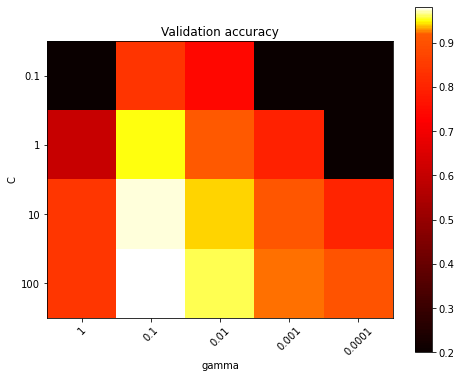

In [38]:
# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.
C_range = [0.1,1,10,100]
gamma_range = [1,0.1,0.01,0.001,0.0001]
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [39]:
MSE1 = np.square(np.subtract(y_test,pred_RandomForest)).mean() 
RMSE1 = math.sqrt(MSE1)


score2 = metrics.r2_score(y_test, pred_LinearRegression)
MSE2 = np.square(np.subtract(y_test,pred_LinearRegression)).mean() 
RMSE2 = math.sqrt(MSE2)

score3 = metrics.r2_score(y_test, pred_SVR)
MSE3 = np.square(np.subtract(y_test,pred_LinearRegression)).mean() 
RMSE3 = math.sqrt(MSE3)

In [40]:
data = {'R2_Score':[score1, score2, score3], 'MSE':[MSE1, MSE2, MSE3], 'RMSE':[RMSE1, RMSE2, RMSE3]}    
RES = pd.DataFrame(data, index =['RANDOMFOREST', 'LINEAR REGRESSION', 'SVR'])   
RES  

,R2_Score,MSE,RMSE
RANDOMFOREST,0.998528,127.355133,11.285173
LINEAR REGRESSION,0.937452,120.259164,10.966274
SVR,0.898156,120.259164,10.966274


Now we predict MOTOR UPDRS using by droping out Age and Sex means we are Using MOTOR 16 dataset

# MOTOR 16 Dataset (without Age and Sex)

In [41]:
m16 = pd.read_csv('motor_16_data.csv')

In [42]:
m16.shape

(5875, 19)

In [43]:
m16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   test_time      5875 non-null   float64
 1   motor_UPDRS    5875 non-null   float64
 2   total_UPDRS    5875 non-null   float64
 3   Jitter(%)      5875 non-null   float64
 4   Jitter(Abs)    5875 non-null   float64
 5   Jitter:RAP     5875 non-null   float64
 6   Jitter:PPQ5    5875 non-null   float64
 7   Jitter:DDP     5875 non-null   float64
 8   Shimmer        5875 non-null   float64
 9   Shimmer(dB)    5875 non-null   float64
 10  Shimmer:APQ3   5875 non-null   float64
 11  Shimmer:APQ5   5875 non-null   float64
 12  Shimmer:APQ11  5875 non-null   float64
 13  Shimmer:DDA    5875 non-null   float64
 14  NHR            5875 non-null   float64
 15  HNR            5875 non-null   float64
 16  RPDE           5875 non-null   float64
 17  DFA            5875 non-null   float64
 18  PPE     

In [44]:
m16.head()

,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


# Predicting MOTOR UPDRS

In [45]:
dependent_variable = 'motor_UPDRS'
independent = m16.columns.tolist()
independent.remove(dependent_variable)
independent

['test_time',
 'total_UPDRS',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [46]:
X =m16[independent].values
Y =m16.iloc[:, [2]].values

In [47]:
Y

array([[34.398],
       [34.894],
       [35.389],
       ...,
       [32.495],
       [32.007],
       [31.513]])

In [48]:
# load and summarize the dataset
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4112, 18) (4112, 1)
Test (1763, 18) (1763, 1)


# Feature Selection

Feature 0: 20.860318
Feature 1: 1682708588044790272.000000
Feature 2: 21.757956
Feature 3: 19.069434
Feature 4: 16.588842
Feature 5: 15.512242
Feature 6: 16.602723
Feature 7: 37.284312
Feature 8: 40.993112
Feature 9: 29.392137
Feature 10: 30.425985
Feature 11: 62.226065
Feature 12: 29.391676
Feature 13: 16.294904
Feature 14: 113.889818
Feature 15: 100.870182
Feature 16: 59.913895
Feature 17: 101.257652


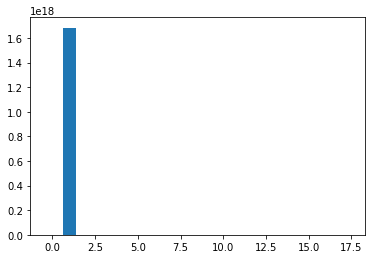

In [49]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train[:,0], X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

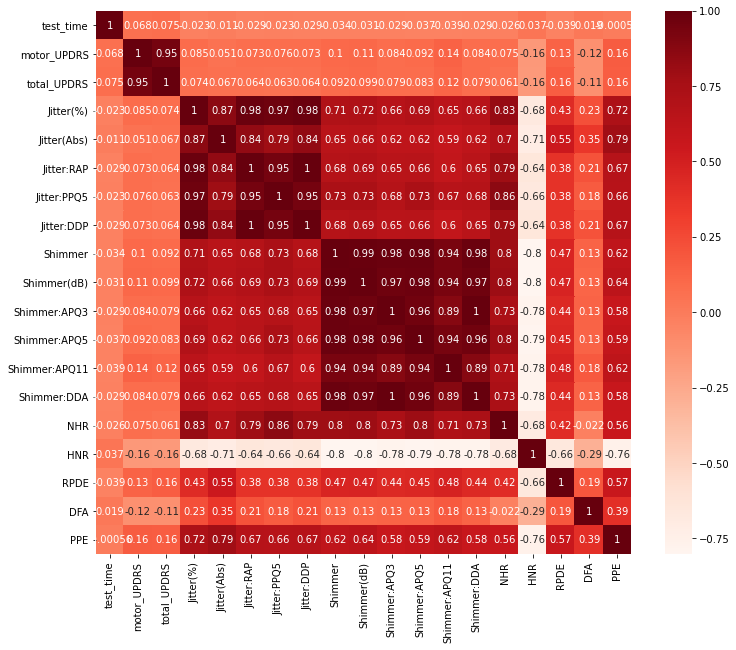

In [50]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = m16.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [51]:
#Correlation with output variable
cor_target = abs(cor['total_UPDRS'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

motor_UPDRS      0.947231
total_UPDRS      1.000000
Shimmer:APQ11    0.120838
HNR              0.162117
RPDE             0.156897
DFA              0.113475
PPE              0.156195
Name: total_UPDRS, dtype: float64

# Model Training

In [52]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



from sklearn.ensemble import RandomForestRegressor
clf1=RandomForestRegressor(n_estimators=500, n_jobs=-1, max_depth=2000, max_leaf_nodes=2350)

from sklearn.svm import SVR
clf2 = SVR(kernel = 'rbf')

from sklearn.linear_model import LinearRegression
clf3 = LinearRegression()

clf1.fit(X_train, y_train)
print("Done")
clf2.fit(X_train, y_train)
print("Done")
clf3.fit(X_train, y_train)
print("Done")



pred_RandomForest=clf1.predict(X_test)
pred_LinearRegression=clf2.predict(X_test)
pred_SVR=clf3.predict(X_test)



<ipython-input-53-81f4b6b46ade>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(X_train, y_train)


Done


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Done
Done


In [54]:
score1 = metrics.r2_score(y_test, pred_RandomForest)

In [55]:
score2 = metrics.r2_score(y_test, pred_LinearRegression)
score3 = metrics.r2_score(y_test, pred_SVR)

print("Random Forest------>  ",score1)
print("Linear Regression------>  ",score2)
print("SVR------>  ",score3)

Random Forest------>   0.9999987637507421
Linear Regression------>   0.9800538953251712
SVR------>   1.0


In [56]:
MSE1 = np.square(np.subtract(y_test,pred_RandomForest)).mean() 
RMSE1 = math.sqrt(MSE1)


score2 = metrics.r2_score(y_test, pred_LinearRegression)
MSE2 = np.square(np.subtract(y_test,pred_LinearRegression)).mean() 
RMSE2 = math.sqrt(MSE2)

score3 = metrics.r2_score(y_test, pred_SVR)
MSE3 = np.square(np.subtract(y_test,pred_LinearRegression)).mean() 
RMSE3 = math.sqrt(MSE3)

In [57]:
data = {'R2_Score':[score1, score2, score3], 'MSE':[MSE1, MSE2, MSE3], 'RMSE':[RMSE1, RMSE2, RMSE3]}    
RES = pd.DataFrame(data, index =['RANDOMFOREST', 'LINEAR REGRESSION', 'SVR'])   
RES

,R2_Score,MSE,RMSE
RANDOMFOREST,0.999999,215.776408,14.689330
LINEAR REGRESSION,0.980054,206.796917,14.380435
SVR,1.000000,206.796917,14.380435
